# CSE-372 High Performance Computing: Haar Wavelet Transform

## 1. Package Imports

In [173]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

## 2. Image Import

In [174]:
img = cv2.imread('Crop.jpeg', cv2.IMREAD_COLOR)

### 2.1 Visualizing the image

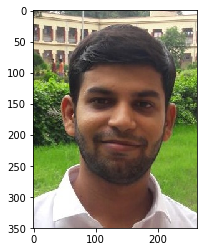

In [175]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 2.2 Getting image dimensions

In [176]:
img.shape

(350, 263, 3)

### 2.3 Resizing the image

In [177]:
img = cv2.resize(img, (512, 512)) # 512 is a power of 2

### 2.4 Visualizing the resized image

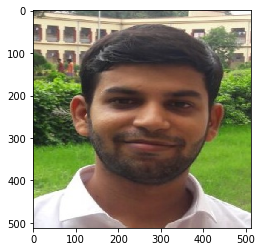

In [193]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 3a. Standard Haar Wavelet Transform (using loops without vectorization)

### 3a.1 Obtaining underlying numpy array

In [206]:
np_arr = np.float64(img)

### 3a.2 Compressing along columns

Effective size 512:


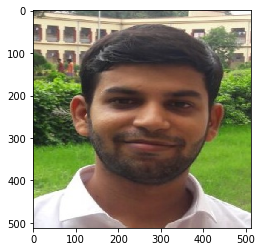

[[ 70.  65.  56. ... 240. 234. 231.]
 [ 74.  70.  62. ... 247. 244. 242.]
 [ 78.  76.  71. ... 253. 252. 251.]
 ...
 [228. 228. 230. ... 237. 234. 232.]
 [228. 229. 230. ... 237. 233. 230.]
 [229. 229. 230. ... 236. 231. 229.]]
Effective size 256:


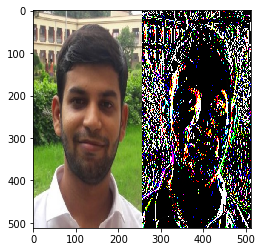

[[ 67.5  56.   65.  ...   1.    3.    1.5]
 [ 72.   62.   70.  ...   0.5   1.5   1. ]
 [ 77.   71.   75.5 ...   0.    0.5   0.5]
 ...
 [228.  231.  234.  ...   0.5   2.    1. ]
 [228.5 231.  234.  ...   1.    2.    1.5]
 [229.  231.  234.  ...   1.    2.5   1. ]]
Effective size 128:


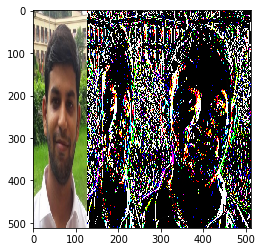

[[ 61.75  69.    84.75 ...   1.     3.     1.5 ]
 [ 67.    73.75  86.   ...   0.5    1.5    1.  ]
 [ 74.    77.75  85.75 ...   0.     0.5    0.5 ]
 ...
 [229.5  235.5  240.5  ...   0.5    2.     1.  ]
 [229.75 235.5  240.   ...   1.     2.     1.5 ]
 [230.   235.25 240.   ...   1.     2.5    1.  ]]
Effective size 64:


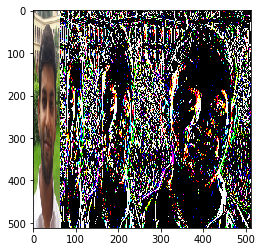

[[ 65.375  84.     94.25  ...   1.      3.      1.5  ]
 [ 70.375  97.375 113.625 ...   0.5     1.5     1.   ]
 [ 75.875 102.625 128.625 ...   0.      0.5     0.5  ]
 ...
 [232.5   242.5   246.25  ...   0.5     2.      1.   ]
 [232.625 242.25  246.25  ...   1.      2.      1.5  ]
 [232.625 242.25  246.25  ...   1.      2.5     1.   ]]
Effective size 32:


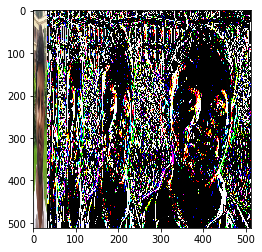

[[ 74.688  93.688 122.    ...   1.      3.      1.5  ]
 [ 83.875 102.25  119.625 ...   0.5     1.5     1.   ]
 [ 89.25  108.75  117.5   ...   0.      0.5     0.5  ]
 ...
 [237.5   248.75  249.938 ...   0.5     2.      1.   ]
 [237.438 248.688 250.375 ...   1.      2.      1.5  ]
 [237.438 248.688 250.875 ...   1.      2.5     1.   ]]
Effective size 16:


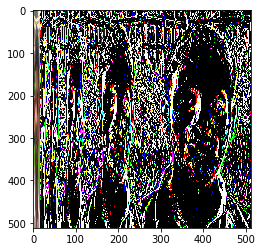

[[ 84.188 130.781 171.656 ...   1.      3.      1.5  ]
 [ 93.062 131.938 168.312 ...   0.5     1.5     1.   ]
 [ 99.    137.594 167.594 ...   0.      0.5     0.5  ]
 ...
 [243.125 244.562 203.875 ...   0.5     2.      1.   ]
 [243.062 245.    202.031 ...   1.      2.      1.5  ]
 [243.062 245.375 200.594 ...   1.      2.5     1.   ]]
Effective size 8:


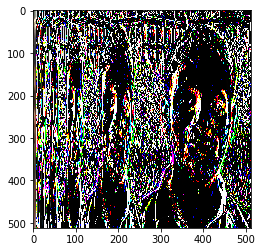

[[107.484 142.266 117.047 ...   1.      3.      1.5  ]
 [112.5   141.359 115.5   ...   0.5     1.5     1.   ]
 [118.297 142.25  113.578 ...   0.      0.5     0.5  ]
 ...
 [243.844 181.609 133.25  ...   0.5     2.      1.   ]
 [244.031 180.578 131.734 ...   1.      2.      1.5  ]
 [244.219 179.781 130.75  ...   1.      2.5     1.   ]]
Effective size 4:


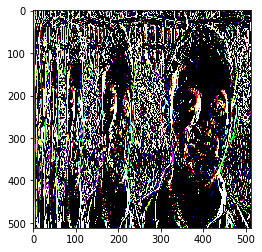

[[124.875 115.492 133.578 ...   1.      3.      1.5  ]
 [126.93  115.078 132.148 ...   0.5     1.5     1.   ]
 [130.273 114.266 130.109 ...   0.      0.5     0.5  ]
 ...
 [212.727 118.781 101.719 ...   0.5     2.      1.   ]
 [212.305 117.617 102.477 ...   1.      2.      1.5  ]
 [212.    116.625 103.07  ...   1.      2.5     1.   ]]
Effective size 2:


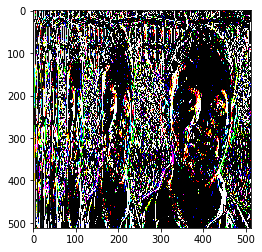

[[120.184 163.441   4.691 ...   1.      3.      1.5  ]
 [121.004 164.492   5.926 ...   0.5     1.5     1.   ]
 [122.27  165.531   8.004 ...   0.      0.5     0.5  ]
 ...
 [165.754 148.555  46.973 ...   0.5     2.      1.   ]
 [164.961 148.746  47.344 ...   1.      2.      1.5  ]
 [164.312 148.945  47.688 ...   1.      2.5     1.   ]]
Effective size 1:


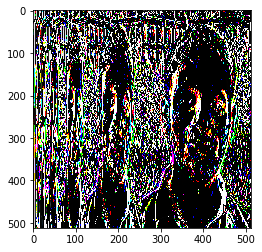

[[141.812 -21.629   4.691 ...   1.      3.      1.5  ]
 [142.748 -21.744   5.926 ...   0.5     1.5     1.   ]
 [143.9   -21.631   8.004 ...   0.      0.5     0.5  ]
 ...
 [157.154   8.6    46.973 ...   0.5     2.      1.   ]
 [156.854   8.107  47.344 ...   1.      2.      1.5  ]
 [156.629   7.684  47.688 ...   1.      2.5     1.   ]]


In [207]:
eff_size = 512   #Effective size of approximation coefficients part
print("Effective size 512:")
plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))
plt.show()
with np.printoptions(precision=3, suppress=True):
        print(np_arr[:,:,0])

while eff_size > 1:
    for channel in range(3):
        approx_coffs = np.zeros((512, eff_size//2))
        detail_coffs = np.zeros((512, eff_size//2))
        for i in range(512):
            for j in range(eff_size//2):
                approx_coffs[i, j] = (np_arr[i, 2*j, channel] + np_arr[i, 2*j+1, channel]) / 2
                detail_coffs[i, j] = (np_arr[i, 2*j, channel] - np_arr[i, 2*j+1, channel]) / 2
        np_arr[:, :eff_size//2, channel] = approx_coffs
        np_arr[:, eff_size//2:eff_size, channel] = detail_coffs
    eff_size //= 2
    print(f"Effective size {eff_size}:")
    plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))
    plt.show()
    with np.printoptions(precision=3, suppress=True):
        print(np_arr[:,:,0])

### 3a.3 Compressing along rows

Effective size 512:


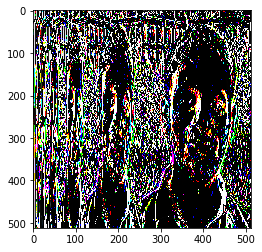

[[141.812 -21.629   4.691 ...   1.      3.      1.5  ]
 [142.748 -21.744   5.926 ...   0.5     1.5     1.   ]
 [143.9   -21.631   8.004 ...   0.      0.5     0.5  ]
 ...
 [157.154   8.6    46.973 ...   0.5     2.      1.   ]
 [156.854   8.107  47.344 ...   1.      2.      1.5  ]
 [156.629   7.684  47.688 ...   1.      2.5     1.   ]]
Effective size 256:


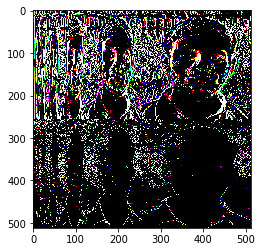

[[142.28  -21.687   5.309 ...   0.75    2.25    1.25 ]
 [144.3   -21.265   9.629 ...   0.      0.75    0.5  ]
 [146.046 -20.858  14.438 ...   0.25    0.25    0.25 ]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 128:


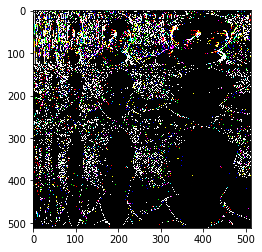

[[143.29  -21.476   7.469 ...   0.375   1.5     0.875]
 [147.014 -21.082  14.562 ...   0.125   0.125   0.125]
 [146.733 -17.03   17.893 ...   0.375  -0.125   0.125]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 64:


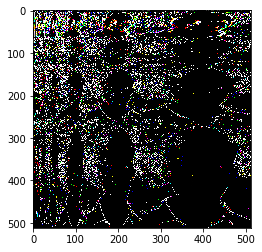

[[145.152 -21.279  11.016 ...   0.25    0.812   0.5  ]
 [147.288 -12.357  22.282 ...   0.438  -0.062   0.25 ]
 [176.393 -16.071  -1.417 ...   0.312   0.312   0.438]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 32:


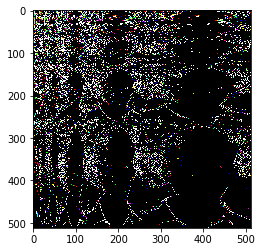

[[146.22  -16.818  16.649 ...   0.344   0.375   0.375]
 [173.53   -6.829   1.676 ...   1.125  -0.5    -0.75 ]
 [157.93   -5.522  -5.036 ...   3.062  -5.     -1.656]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 16:


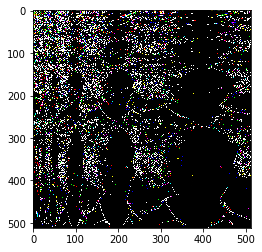

[[159.875 -11.823   9.162 ...   0.734  -0.062  -0.188]
 [136.464  -2.832  -1.671 ...   0.188  -0.922   3.516]
 [104.786  15.24   35.316 ...  -3.344   3.688   3.516]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 8:


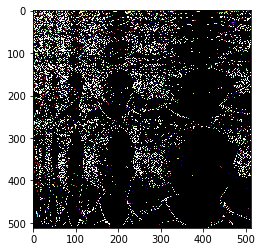

[[148.169  -7.328   3.746 ...   0.461  -0.492   1.664]
 [ 90.625   9.018  28.105 ...   0.203   3.711   3.406]
 [ 64.11    3.832  -7.68  ...   0.719   0.875   0.438]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 4:


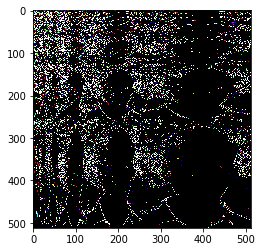

[[119.397   0.845  15.926 ...   0.332   1.609   2.535]
 [ 63.339   4.824 -10.738 ...   0.508   0.691   0.309]
 [ 51.78    3.331  -8.169 ...   0.031   0.109  -0.027]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]
Effective size 2:


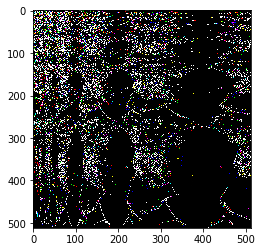

[[91.368  2.835  2.594 ...  0.42   1.15   1.422]
 [86.339 12.201 22.977 ...  0.18   0.207  0.02 ]
 [28.029 -1.99  13.332 ... -0.088  0.459  1.113]
 ...
 [ 0.002  0.072  0.191 ...  0.25   0.     0.25 ]
 [ 0.14   0.206 -0.064 ...  0.    -0.25  -0.25 ]
 [ 0.112  0.212 -0.172 ...  0.    -0.25   0.25 ]]
Effective size 1:


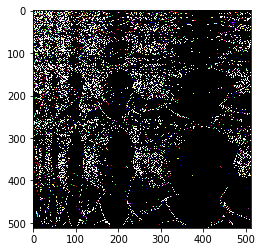

[[ 88.853   7.518  12.785 ...   0.3     0.679   0.721]
 [  2.515  -4.683 -10.191 ...   0.12    0.472   0.701]
 [ 28.029  -1.99   13.332 ...  -0.088   0.459   1.113]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]


In [208]:
eff_size = 512   #Effective size of approximation coefficients part
print("Effective size 512:")
plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))
plt.show()
with np.printoptions(precision=3, suppress=True):
        print(np_arr[:,:,0])

while eff_size > 1:
    for channel in range(3):
        approx_coffs = np.zeros((eff_size//2, 512))
        detail_coffs = np.zeros((eff_size//2, 512))
        for j in range(512):
            for i in range(eff_size//2):
                approx_coffs[i, j] = (np_arr[2*i, j, channel] + np_arr[2*i+1, j, channel]) / 2
                detail_coffs[i, j] = (np_arr[2*i, j, channel] - np_arr[2*i+1, j, channel]) / 2
        np_arr[:eff_size//2, :, channel] = approx_coffs
        np_arr[eff_size//2:eff_size, :, channel] = detail_coffs
    eff_size //= 2
    print(f"Effective size {eff_size}:")
    plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))
    plt.show()
    with np.printoptions(precision=3, suppress=True):
        print(np_arr[:,:,0])

## 3b. Standard Haar Wavelet Transform (vectorized)

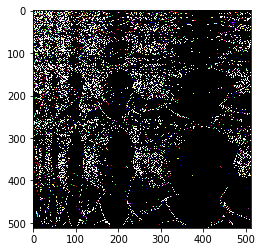

[[ 88.853   7.518  12.785 ...   0.3     0.679   0.721]
 [  2.515  -4.683 -10.191 ...   0.12    0.472   0.701]
 [ 28.029  -1.99   13.332 ...  -0.088   0.459   1.113]
 ...
 [  0.002   0.072   0.191 ...   0.25    0.      0.25 ]
 [  0.14    0.206  -0.064 ...   0.     -0.25   -0.25 ]
 [  0.112   0.212  -0.172 ...   0.     -0.25    0.25 ]]


In [209]:
np_arr = np.float64(img)

eff_size = 512   #Effective size of approximation coefficients part

haar_mat = np.eye(512, 512)
while eff_size > 1:
    haar_mat_cur = np.zeros((512, 512))
    for i in range(eff_size):
        haar_mat_cur[i, i//2] = 0.5
        haar_mat_cur[i, eff_size//2 + i//2] = (-0.5 if i&1 else 0.5)
    for i in range(eff_size, 512):
        haar_mat_cur[i, i] = 1
    haar_mat = haar_mat @ haar_mat_cur
    eff_size //= 2
    
for channel in range(3):
    np_arr[:,:,channel] = haar_mat.T @ np_arr[:,:,channel] @ haar_mat
plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))
plt.show()
with np.printoptions(precision=3, suppress=True):
    print(np_arr[:,:,0])

The result obtained through the vectorized approach is same as that obtained using loops (without vectorization).

## 4. Normalized Haar Wavelet Transform

### 4.1 Applying the Normalized Haar Wavelet Transform

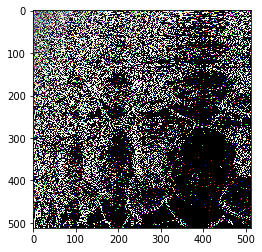

[[45492.99   3849.135  4628.765 ...     9.594    21.719    23.062]
 [ 1287.518 -2397.783 -3689.716 ...     3.844    15.094    22.437]
 [10147.496  -720.337  3412.93  ...    -1.989    10.386    25.191]
 ...
 [    0.063     2.313     4.331 ...     0.5       0.        0.5  ]
 [    4.469     6.594    -1.458 ...     0.       -0.5      -0.5  ]
 [    3.594     6.781    -3.889 ...     0.       -0.5       0.5  ]]


In [218]:
np_arr = np.float64(img)

eff_size = 512   #Effective size of approximation coefficients part

haar_mat = np.eye(512, 512)
while eff_size > 1:
    haar_mat_cur = np.zeros((512, 512))
    for i in range(eff_size):
        haar_mat_cur[i, i//2] = 1/np.sqrt(2)
        haar_mat_cur[i, eff_size//2 + i//2] = (-1/np.sqrt(2) if i&1 else 1/np.sqrt(2))
    for i in range(eff_size, 512):
        haar_mat_cur[i, i] = 1
    haar_mat = haar_mat @ haar_mat_cur
    eff_size //= 2
    
for channel in range(3):
    np_arr[:,:,channel] = haar_mat.T @ np_arr[:,:,channel] @ haar_mat
plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))
plt.show()
with np.printoptions(precision=3, suppress=True):
    print(np_arr[:,:,0])

### 4.2 Checking transpose-inverse equality of the Haar matrix

In [211]:
with np.printoptions(precision=3, suppress=True):
    print("Traspose of the normalized Haar matrix:")
    print(haar_mat.T)
    print("\nInverse of the normalized Haar matrix:")
    print(np.linalg.inv(haar_mat))

Traspose of the normalized Haar matrix:
[[ 0.044  0.044  0.044 ...  0.044  0.044  0.044]
 [ 0.044  0.044  0.044 ... -0.044 -0.044 -0.044]
 [ 0.062  0.062  0.062 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.     0.     0.   ]
 [ 0.     0.     0.    ... -0.707  0.     0.   ]
 [ 0.     0.     0.    ...  0.     0.707 -0.707]]

Inverse of the normalized Haar matrix:
[[ 0.044  0.044  0.044 ...  0.044  0.044  0.044]
 [ 0.044  0.044  0.044 ... -0.044 -0.044 -0.044]
 [ 0.063  0.063  0.063 ... -0.    -0.    -0.   ]
 ...
 [-0.    -0.    -0.    ... -0.    -0.    -0.   ]
 [-0.    -0.    -0.    ... -0.707 -0.    -0.   ]
 [-0.    -0.    -0.    ... -0.     0.707 -0.707]]


The inverse of the normalized Haar wavelet transform  matrix is indeed equal  to its transpose.

## 5. Decompressing the image

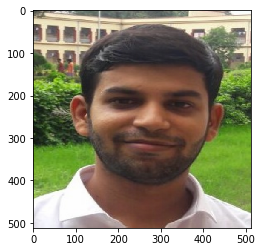

In [212]:
for channel in range(3):
    np_arr[:,:,channel] = haar_mat @ np_arr[:,:,channel] @ haar_mat.T
plt.imshow(cv2.cvtColor(np.uint8(np_arr), cv2.COLOR_BGR2RGB))